<h1><center> Math761 - HW 4 <br>
    Accceptance/Rejection Method </center> </h1>

## General Instructions

_This homework requires you two submit two things now and one thing later:_

1) A jupyter notebook (.ipynb file) which will include your code, the results from when you ran the code, and textual interpetations as asked in the questions.

2) A video (12 minute max).  Each question specifies the part you need to explain by video. For example, if part a of question 1 says "**Explain in Video**", then after you have finished writing up your work **(which may include math calculations as well as code)** to your satisfaction (or to the point where you have to submit before the deadline!), please record a video where you go over your work (math and code) and explain what each part of it does and the role each part plays in helping you to achieve the statistical goal of the question. Note that the whole video you submit for your whole assignment should be 10 minutes or less. If your video goes over the max limit, I will only grade or give feedback up to the max limit. This is so that I can give everyone feedback in a timely manner. It may be helpful if you rehearse your video before you record it or use a video editor (Da Vinci is free) to help you keep your video under the time limit while letting you cover all the important information you want to explain.

3) After I give you feedback on the homework, you'll submit your own scoring of your corrected work, where you should also explain why you gave yourself each rubric score.

_This homework also has a metacognitive component that asks you to reflect on your own learning_:
To give you the opportunity and encourage you to reflect on your own work, learn from mistakes, and reward you for improving, for the last two questions of each homework, I will provide you feedback but no grade. Instead, you will be able to take the feedback to improve your work. Then you will self-assess using the rubric provided. This you will simply need to submit before the midterm. There will be a submission link on MyOpenMath for you before then.

<br>

_Grading_:
The two grading rubrics (how I will grade and the rubric you will use to self-assess your improvements) are here https://docs.google.com/document/d/1cRBYFNs2MA4_RcxgxozJTbj3gC1xng2ksOfKi95jGZg/edit?usp=sharing. The grade you will see for this homework will be the grade that I provide on my two questions. However, they are only worth 50% of your HW grade. You will submit your self-assessment (before the midterm), which you should also save for your "portfolio". At the end of the term, we will meet for 5-10 minutes to go over your portfolio so that you can tell me how you evaluate your own improvements and how you graded yourself. Based on this we will come up with the other 50% of your overall HW grade.




<br>


### Exercise 1: Proof of the A/R Method for the discrete case

**Write-up Only** We saw a proof in the continuous case that, if we sample values y from density function $g_Y(Y)$ on the support of X and accept the sample values with probability  $\frac{f_X(y)}{cg_Y(y)}$, then result would be a sample from the target density $f_X(y)$. Please prove this in the discrete case IN YOUR OWN WORDS (we might get to this in class so I want you to write it in your own words, because it will help settle the ideas in your brain.) The discrete case is very similar to the continuous one, and it is good to take the opportunity to study the continuous-case proof carefully.)

The solution for exercise 1 is attached in the PDF with the notebook file

### Exercise 2: A/R for a ball

The A/R method can be used to draw points from geometric shapes.

#### a) **Explain in Video.** 200 points from a circle
Please implement the A/R method to draw 200 points uniformly from a circle.

As part of your code, please also keep count of the number of iterations you have to go through in total in order to make 200 successful draws and output this number at the end.

Also, plot the points to make sure they look like they are drawn from a circle, including the inside of the circle!

#### b) **Explain in Video.** 200 points from a 3-D ball
Please also implement the A/R method to draw 200 points uniformly from a ball in 3 dimensions.

As part of your code, please also keep count of the number of iterations you have to go through in total in order to make 200 successful draws and output this number at the end.

Hint: To check that the points really are drawn from a 3-D ball, please make sure that when you plot the following three test data sets:

    test1 <- YourMatrixOfRandomlySampledDirections[,1:2]
    test2 <- YourMatrixOfRandomlySampledDirections[,c(1,3)]
    test3 <- YourMatrixOfRandomlySampledDirections[,2:3]

that each returns a plot of a circle.


You may want to look at what `par(mfrow=c(2,2))` does. (But remember to set your plot back to `par(mfrow=c(1,1))` afterwards.)

#### c) **Write-up Only.** What do you notice about the number of draws you need to create a d-sphere as d increased from 2 to 3?

Total iterations to get 200 points: 244 


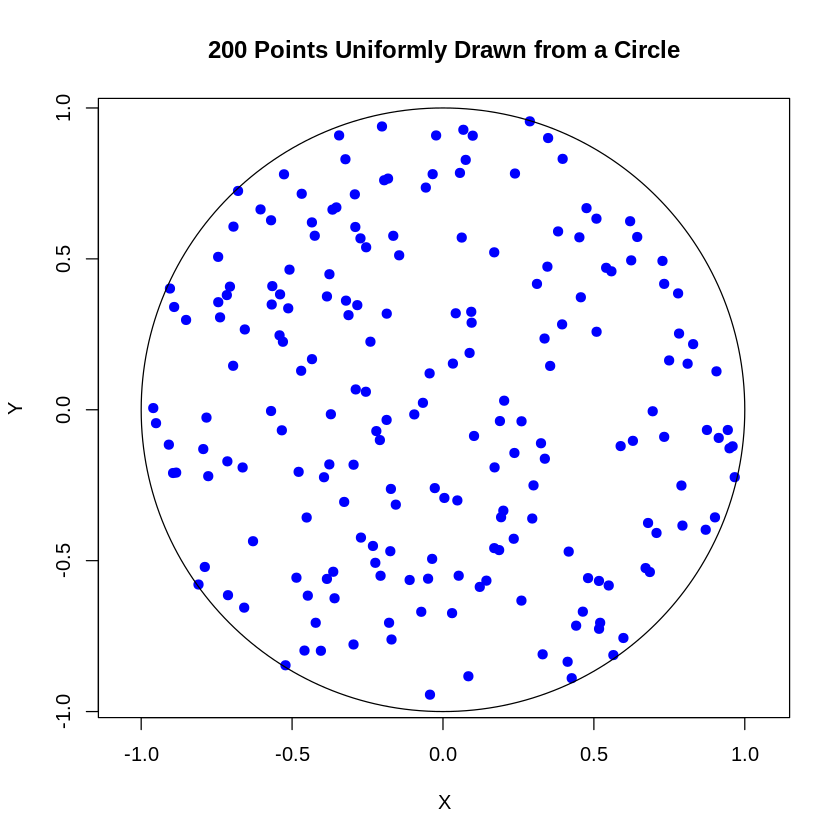

In [ ]:
# Question 2A
# Set parameters
set.seed(123)  # For reproducibility
n_points <- 200
count <- 0     # To count the total iterations
accepted <- 0  # To count the accepted points

# Empty vectors to store points
x_points <- numeric()
y_points <- numeric()

# A/R method to draw points inside a circle
while (accepted < n_points) {
  count <- count + 1

  # Generate two random points between -1 and 1 (bounding box for the circle)
  x <- runif(1, -1, 1)
  y <- runif(1, -1, 1)

  # Check if the point lies inside the unit circle
  if (x^2 + y^2 <= 1) {
    x_points <- c(x_points, x)
    y_points <- c(y_points, y)
    accepted <- accepted + 1
  }
}

# Output the number of iterations
cat("Total iterations to get 200 points:", count, "\n")

# Plot the points
plot(x_points, y_points, asp = 1, main = "200 Points Uniformly Drawn from a Circle",
     xlab = "X", ylab = "Y", pch = 19, col = "blue")
symbols(0, 0, circles = 1, add = TRUE, inches = FALSE)  # Draw the circle boundary

Total iterations to get 200 points: 354 


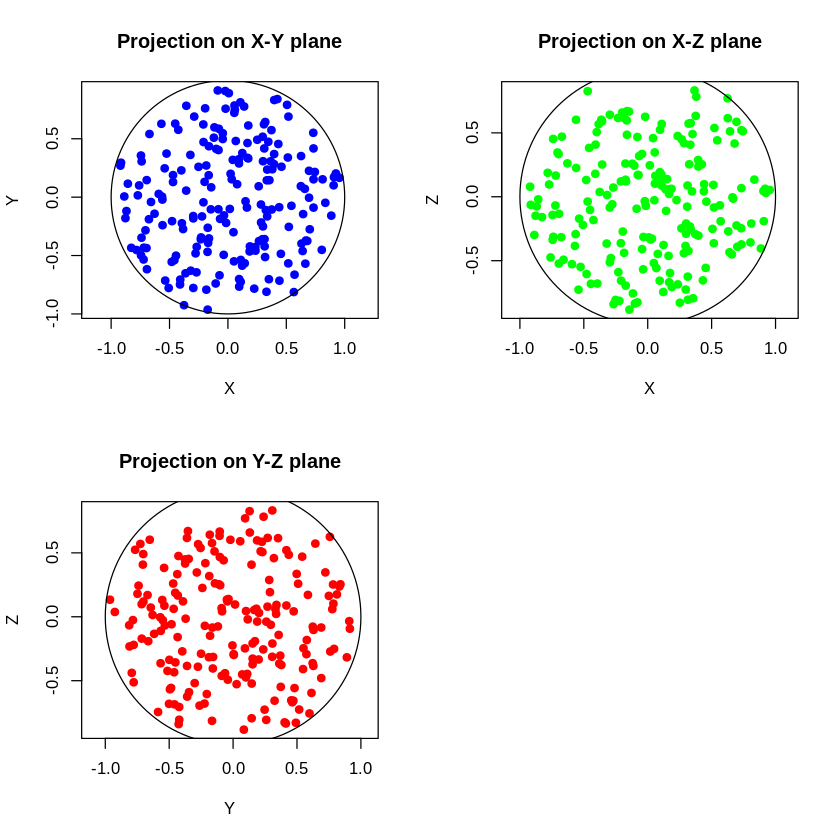

In [ ]:
# Question 2B
# Set parameters
set.seed(123)  # For reproducibility
n_points <- 200
count <- 0     # To count total iterations
accepted <- 0  # To count accepted points

# Empty matrices to store points
points_3d <- matrix(0, nrow = n_points, ncol = 3)

# A/R method to draw points inside a 3D ball
while (accepted < n_points) {
  count <- count + 1

  # Generate three random points between -1 and 1 (bounding box for the sphere)
  x <- runif(1, -1, 1)
  y <- runif(1, -1, 1)
  z <- runif(1, -1, 1)

  # Check if the point lies inside the unit sphere
  if (x^2 + y^2 + z^2 <= 1) {
    points_3d[accepted + 1, ] <- c(x, y, z)
    accepted <- accepted + 1
  }
}

# Output the number of iterations
cat("Total iterations to get 200 points:", count, "\n")

# Prepare the data for plotting projections
test1 <- points_3d[, 1:2]   # Projection on X-Y plane
test2 <- points_3d[, c(1,3)] # Projection on X-Z plane
test3 <- points_3d[, 2:3]   # Projection on Y-Z plane

# Set up a 2x2 plot grid
par(mfrow = c(2, 2))

# Plot projections of the points
plot(test1, main = "Projection on X-Y plane", xlab = "X", ylab = "Y", pch = 19, col = "blue", asp = 1)
symbols(0, 0, circles = 1, add = TRUE, inches = FALSE)  # Circle for unit ball boundary

plot(test2, main = "Projection on X-Z plane", xlab = "X", ylab = "Z", pch = 19, col = "green", asp = 1)
symbols(0, 0, circles = 1, add = TRUE, inches = FALSE)

plot(test3, main = "Projection on Y-Z plane", xlab = "Y", ylab = "Z", pch = 19, col = "red", asp = 1)
symbols(0, 0, circles = 1, add = TRUE, inches = FALSE)

# Reset plot settings
par(mfrow = c(1, 1))

Question 2C:

As the number of dimensions increases, the number of draws required to obtain points increases. As the dimensionality increases, the space inside the bounding box is less concentrated around the sphere, which reduces the probability of randomly drawn points falling inside the sphere. In my case, the number of iterations increased from 244 in 2D to 354 in 3D, reflecting the inefficiency of the A/R method as the number of dimensions increases.

### Exercise 3

**Explain in Video**   Use an appropriate method introduced in class to draw 10,000 rvs from this target distribution:

$$
\pi(x) = \frac{3}{4}(1-x^2), \text{ for } |x| \leq 1
$$

Also, make a histogram density estimate with the actual target $\pi(x)$ drawn over it for comparison.  Also calculate the ratio of acceptances to total number of draws. As always, any math and other statistical reasonin used should be explained!


Hint. Output should look like this (you don't need to make the curve blue though):
![image-2.png](attachment:image-2.png)


Acceptance Ratio: 0.6585013 


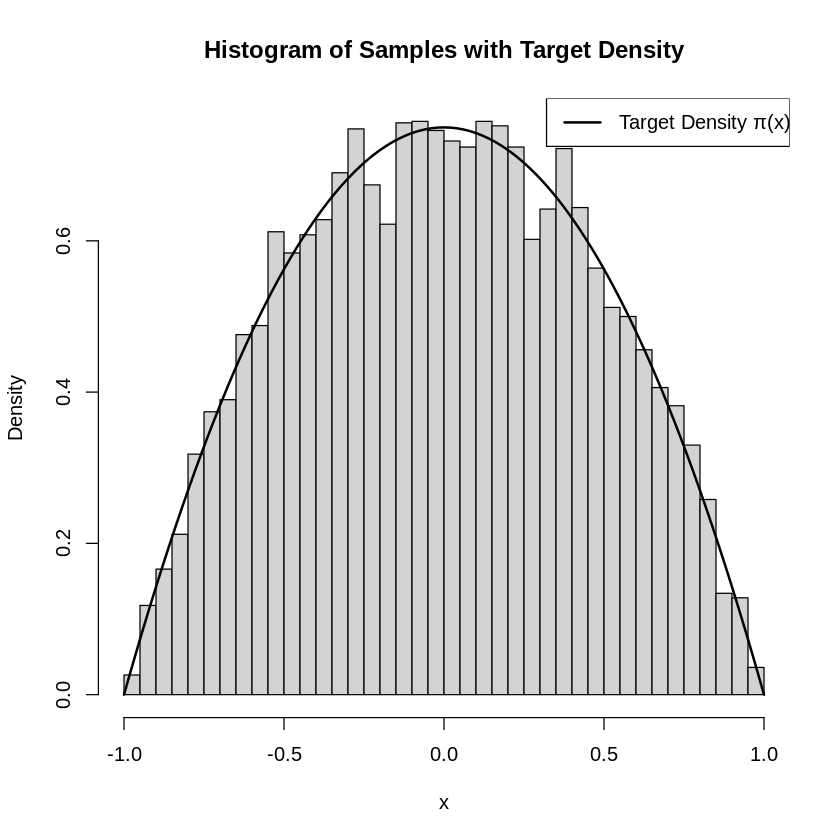

In [ ]:
# Defining the target distribution
pi_x <- function(x) {
  if (abs(x) <= 1) {
    return(0.75 * (1 - x^2))
  } else {
    return(0)
  }
}

# Vectorizing the function
pi_x_vec <- Vectorize(pi_x)

# Setting up the number of samples
n_samples <- 10000

# Rejection sampling
samples <- numeric(n_samples)  # store the accepted samples
n_trials <- 0                  # count the total number of trials
n_acceptances <- 0             # count the number of acceptances

# Perform rejection sampling
while (n_acceptances < n_samples) {
  # Proposal distribution: Uniformly sample from [-1, 1]
  x_proposal <- runif(1, -1, 1)

  # Sampling from uniform distribution for the acceptance criterion
  u <- runif(1, 0, 0.75)  # Max value of pi(x) is 0.75

  # Checking if we accept the proposal
  if (u <= pi_x(x_proposal)) {
    samples[n_acceptances + 1] <- x_proposal
    n_acceptances <- n_acceptances + 1
  }

  # Increment total trials
  n_trials <- n_trials + 1
}

# Calculating the acceptance ratio
acceptance_ratio <- n_acceptances / n_trials
cat("Acceptance Ratio:", acceptance_ratio, "\n")

# Plotting histogram of the sampled values
hist(samples, breaks = 30, probability = TRUE, col = "lightgray",
     main = "Histogram of Samples with Target Density", xlab = "x")

# Overlay the target distribution pi(x)
curve(pi_x_vec, from = -1, to = 1, lwd = 2, add = TRUE)

legend("topright", legend = c("Target Density π(x)"), lwd = 2)

### Exercise 4:  Sample from Trapezoid

Recall the question from class where we have five students sitting at the coordinates:

(0.1, 0.8), (0.2, 0.9), (0.4, 0.3), (0.5, 0.5), (0.6, 0.7)

![image.png](attachment:image.png)

Now imagine that the room is a trapezoidal classroom where the four corners are at the points
(0,0), (0,1), (2,1), and (1.3, 0). The main idea here is to figure out how to sample from this irregularly shaped room.


 a) **Explain in Video** Similar to HW2, using simulation, please approximate the p-value that we would see data as extreme as this data (two-sided test using the same distance statistic as before) if the students really were sitting randomly, independently uniformly around the classroom. Make sure you justify which direction you use when for the inequality to get the pvalue.

 Hint: there might be other ways to generate this, but if you do what I did, then your first randomly generated statistic should be `7.71213031970951`.

b) **Explain in Video**  Then answer: what is your conclusion about how students sat in class? Use hypothesis testing at the $\alpha=.05$ level.


Observed Statistic: 8.41703 
P-value: 0.2297 


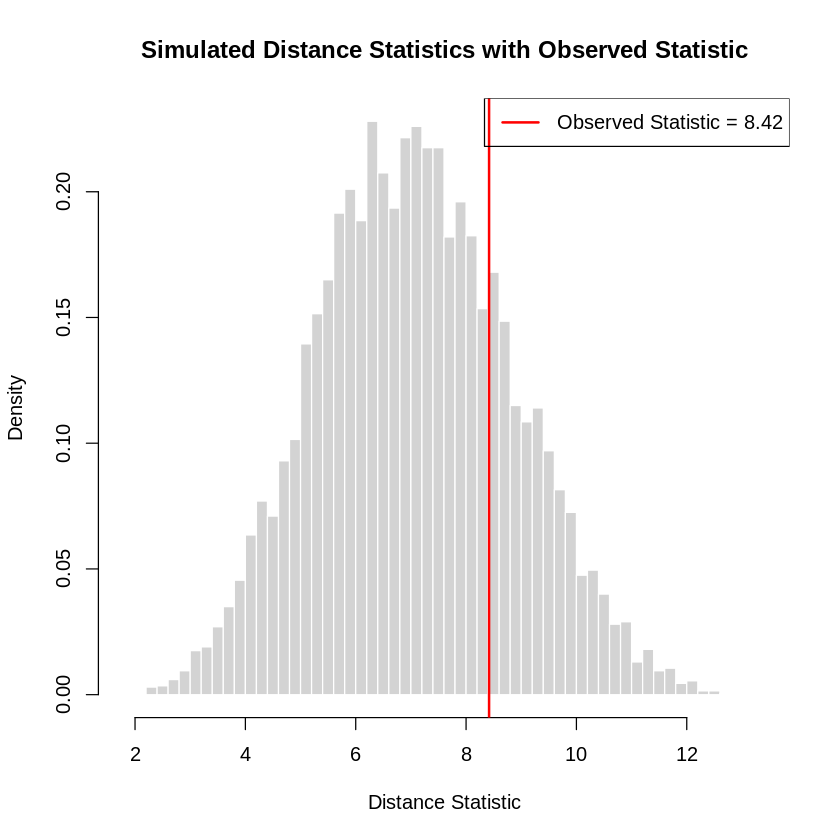

In [ ]:
# Define the observed seating positions of the students
xcord <- c(0.1, 0.2, 0.4, 0.5, 0.6)
ycord <- c(0.8, 0.9, 0.3, 0.5, 0.7)

# Define the vertices of the trapezoid
trap_x <- c(0, 0, 2, 1.3)
trap_y <- c(0, 1, 1, 0)

# Function to check if a point is inside the trapezoid using linear inequalities
inside_trapezoid <- function(x, y) {
  # The left side is vertical x = 0, right side is vertical x = 2
  # Top is the horizontal line y = 1
  # Bottom side is defined by the line from (0, 0) to (1.3, 0)

  slope_bottom <- 0  # since the bottom is horizontal
  slope_right_side <- (0 - 1) / (1.3 - 2)
  intercept_right_side <- 1

  return(
    (x >= 0 && x <= 2) &&   # Inside the x boundaries
    (y >= 0 && y <= 1) &&   # Inside the y boundaries
    (y <= intercept_right_side + slope_right_side * (x - 2))  # Below the right slope
  )
}

# Function to generate 'n' random points inside the trapezoid
generate_points <- function(n) {
  points <- matrix(NA, ncol = 2, nrow = n)
  for (i in 1:n) {
    while (TRUE) {
      x <- runif(1, 0, 2)
      y <- runif(1, 0, 1)
      if (inside_trapezoid(x, y)) {
        points[i, ] <- c(x, y)
        break
      }
    }
  }
  return(points)
}

# Function to compute the total pairwise distances between points
pointDistances <- function(xVec, yVec) {
  n <- length(xVec)
  total <- 0
  for (i in 1:n) {
    for (j in 1:n) {
      # Calculate the distance between each pair of points
      distanceBtwPair <- sqrt((xVec[i] - xVec[j])^2 + (yVec[i] - yVec[j])^2)
      total <- total + distanceBtwPair
    }
  }
  return(total)
}

# Compute the observed statistic for the actual seating arrangement
observed_statistic <- pointDistances(xcord, ycord)
cat("Observed Statistic:", observed_statistic, "\n")

# Set up the simulation parameters
n_simulations <- 10000
n_students <- 5
set.seed(1)  # Ensure reproducibility
simulated_statistics <- numeric(n_simulations)

# Simulate random seating arrangements and compute the distance statistic
for (i in 1:n_simulations) {
  random_points <- generate_points(n_students)
  simulated_statistics[i] <- pointDistances(random_points[, 1], random_points[, 2])
}

# Calculate the p-value (two-sided test)
p_value <- mean(abs(simulated_statistics) >= abs(observed_statistic))
cat("P-value:", p_value, "\n")

# Plot the histogram of the simulated statistics with the observed statistic
hist(simulated_statistics, breaks = 50, probability = TRUE,
     main = "Simulated Distance Statistics with Observed Statistic",
     xlab = "Distance Statistic", col = "lightgray", border = "white")

# Add a line for the observed statistic and display its value in the legend
abline(v = observed_statistic, col = "red", lwd = 2)
legend("topright", legend = paste("Observed Statistic =", round(observed_statistic, 2)),
       col = "red", lwd = 2)

Question 4B :

$H_0:$ The students are sitting randomly

$H_a:$ The students are not sitting randomly.

As you can see above, I got a p-value of 0.2297, and using the $\alpha$  = 0.05, we will fail to reject the null hypothesis. Which means that there is not enough evidence to conclude that the seating arrangement is not random